**中文维基百科建立word2vec模型的过程** <br><br>
- 下载wiki语料[文件](https://dumps.wikimedia.org/zhwiki/20190720/)<br><br>
- 利用[Extractor](https://github.com/attardi/wikiextractor)将wiki压缩文件提取之后，得到文件wiki00和wiki01<br><br>
- 再用opencc这个工具把wiki00和wiki01两个文件从繁体字转换为简体字 ->res00,res01<br><br>
- 然后再将文件中的特殊字符 ->res00_updated-new,res01_updated-new<br><br>
- Python打开两个文件，利用jieba分词处理成符合模型要求的list结构 -> sentences<br><br>
- 在[百度AI](https://aistudio.baidu.com/aistudio/projectoverview/private)用word2vec对sentences建模<br><br>

[参考资料1](http://qfdk.bitcron.com/post/2017-03-04)
[参考资料2](https://blog.csdn.net/wangyangzhizhou/article/details/78348949)
[参考资料3](https://www.jianshu.com/p/eb973255e322)
[参考资料4](http://funhacks.net/explore-python/File-Directory/text_file_io.html)

**文件具体处理过程**<br><br>
1 把语料文件下载好以后，放入新建的文件夹wiki中<br><br>
2 在wiki文件夹中使用shell命令
```shell
git clone https://github.com/attardi/wikiextractor.git wikiextractor
```
3 把语料文件再次放入wikiextractor中<br><br>
4 这文件夹wikiextractor中使用脚本命令(此过程需要处理一段时间，静等即可)
```shell
python WikiExtractor.py -b 1024M -o extracted zhwiki-20190720-pages-articles-multistream.xml.bz2
```
5 处理完毕之后会得到wiki00和wiki01两个文件，其中包含大量繁体字，需要转为简体<br><br>
6 下载opencc的windows版本，把wiki00和wiki01两个文件放入下载好的opencc文件夹中<br><br>
7 在opencc的文件夹中使用脚本命令
```shell

opencc -i wiki_00 -o res_00 -c t2s.json
opencc -i wiki_01 -o res_01 -c t2s.json
```
8 这时候得到文件res_00和res_01就是简体字格式，下面用python将文件中的特殊字符替换掉

### 替换特殊字符第一步

In [2]:
# -*- coding: utf-8 -*-
import os
import re
import codecs

def replace_func(input_file):
    p1 = re.compile(r'-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-')
    p2 = re.compile(r'[（][，；。？！\s]∗[）][，；。？！\s]∗[）]')
    p3 = re.compile(r'[「『]')
    p4 = re.compile(r'[」』]')
    outfile = codecs.open(input_file + "_updated", 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            line = p1.sub(r'\2', line)
            line = p2.sub(r'', line)
            line = p3.sub(r'“', line)
            line = p4.sub(r'”', line)
            outfile.write(line)
    outfile.close()

def run():
    data = [r'C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\wikiextractor\extracted\opencc-1.0.1-win64\res00',
            r'C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\wikiextractor\extracted\opencc-1.0.1-win64\res01']
    for data_name in data:
        replace_func(data_name)
        print('{0} has been processed !'.format(data_name))

if __name__ == '__main__':
    run()

C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\wikiextractor\extracted\opencc-1.0.1-win64\res00 has been processed !
C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\wikiextractor\extracted\opencc-1.0.1-win64\res01 has been processed !


### 替换特殊字符第二步

In [13]:
def filte(input_file):
    p1 = re.compile('（）')
    p2 = re.compile('《》')
    p3 = re.compile('「')
    p4 = re.compile('」')
    p5 = re.compile('<doc (.*)>')
    p6 = re.compile('</doc>')
    outfile = codecs.open(input_file + '-new', 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            line = p1.sub('', line)
            line = p2.sub('', line)
            line = p3.sub('', line)
            line = p4.sub('', line)
            line = p5.sub('', line)
            line = p6.sub('', line)
            outfile.write(line)
    outfile.close()

filte(r'C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\res00_updated')
filte(r'C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\res01_updated')
print(1)

1


### 文件预处理-jieba分词<br>
根据上面python代码对res_00和res_01两个文件进行的处理，最后得到没有了特殊字符的两个文件res00_updated-new和res01_updated-new

**我的原始代码中，针对每一行进行分词时，没有在行结尾补充分行符号，导致后面无法形成符号word2vec的list。这个错误耽误了我很久的时间，很惭愧，这里特加说明一下。另外，因为分词的时间实在太久，且容易造成jupyter notebook崩溃，所以这里就不放具体结果了**

### 构建模型

In [2]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

word2vec(words)的参数words，可以是list of list of words，也可以是一个经过处理的大文件。<br><br>
**所以这里有两种方法构建模型。**<br><br>
**1 直接放入大文件。**大文件的句子，句子与句子是分行的，且每一行句子内的词有空格隔开。
```python
corpus = Linesentence('corpus.txt')
```

再把corpus丢给模型即可<br><br>
**2 放入词列表**

#### 大文件法

- 把语料文件分好词分好句，写入一个大文件中，即test_corpus.txt<br><br>
- 分词将消耗很长的时间，40分钟左右

In [ ]:
# 将分好词的句子用空格隔开，按行写入test文件
filename = 'test_corpus.txt'
fileneedCut1 = '/home/aistudio/data/data10353/res00_updated-new'
fileneedCut2 = '/home/aistudio/data/data10353/res01_updated-new'

fn1 = open(fileneedCut1,"r",encoding="utf-8")
fn2 = open(fileneedCut2,"r",encoding="utf-8")
f = open(filename,"w+",encoding="utf-8")

for fn in [fn1, fn2]:
    for line in fn.readlines():
        words=jieba.cut(line)
        newline = ' '.join(words)
        f.writelines(newline)

f.close()
fn1.close()
fn2.close()

- 用LineSentence读取test_corpus，再放入Word2Vec模型即可<br><br>
- 模型训练过程约20分钟，将结果导入本地<br><br>
- 每一个词向量的维度为200

In [ ]:
wiki = open('test_corpus.txt', 'r',encoding='utf-8')
model = Word2Vec(LineSentence(wiki), sg=0,size=200, window=20, min_count=200, workers=6)
model.save('Mymodel_wiki1')

In [32]:
model1 = Word2Vec.load('Mymodel_wiki1')

2019-07-30 23:22:21,173 : INFO : loading Word2Vec object from Mymodel_wiki1
2019-07-30 23:22:21,291 : INFO : loading wv recursively from Mymodel_wiki1.wv.* with mmap=None
2019-07-30 23:22:21,291 : INFO : loading vectors from Mymodel_wiki1.wv.vectors.npy with mmap=None
2019-07-30 23:22:21,324 : INFO : setting ignored attribute vectors_norm to None
2019-07-30 23:22:21,325 : INFO : loading vocabulary recursively from Mymodel_wiki1.vocabulary.* with mmap=None
2019-07-30 23:22:21,326 : INFO : loading trainables recursively from Mymodel_wiki1.trainables.* with mmap=None
2019-07-30 23:22:21,327 : INFO : loading syn1neg from Mymodel_wiki1.trainables.syn1neg.npy with mmap=None
2019-07-30 23:22:21,361 : INFO : loaded Mymodel_wiki1


In [50]:
model1['李白']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.2095313e+00,  1.1350394e+00, -1.8496299e+00,  2.5353234e+00,
       -6.3057643e-01,  2.6729169e+00,  7.1327960e-01, -5.3383511e-01,
        4.4766054e-01, -1.9852380e-01, -3.4283397e-01,  1.2287462e+00,
        2.3963709e+00, -3.7290370e+00,  4.0689473e+00,  1.2034938e+00,
        2.8569287e-02,  4.0146181e-01,  7.4448025e-01,  1.0544305e+00,
        9.8849458e-01,  6.3529295e-01, -1.4530116e+00, -1.1505325e+00,
       -7.8067517e-01,  1.4535527e-01,  1.1852853e+00, -3.2161288e+00,
       -1.0113389e+00, -3.9810702e-01, -3.4770215e-01,  1.1992451e+00,
        1.0952741e+00, -6.0782939e-01, -1.4668796e+00,  1.1319398e+00,
       -5.0418482e+00, -2.3370662e+00, -5.9598047e-01,  1.6736386e+00,
       -2.4599880e-01, -1.8072283e+00, -3.1933351e+00,  1.3373154e+00,
        1.1768874e+00,  1.2963257e+00,  3.6491411e+00,  3.4756825e+00,
        1.2135216e+00,  3.7710342e+00,  9.3388486e-01, -4.1427225e-01,
       -5.9984529e-01, -5.1348305e-01,  7.3912209e-01, -7.0578510e-01,
      

In [38]:
model1.most_similar(['金庸'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-07-30 23:24:47,403 : INFO : precomputing L2-norms of word weight vectors


[('武侠小说', 0.8230088949203491),
 ('射雕', 0.7699108719825745),
 ('天龙八部', 0.7419607043266296),
 ('屠龙记', 0.7412855625152588),
 ('笑傲江湖', 0.7277038097381592),
 ('英雄传', 0.7177136540412903),
 ('倚天', 0.714233934879303),
 ('神雕侠侣', 0.7110285758972168),
 ('古龙', 0.6876047849655151),
 ('武侠', 0.6511611938476562)]

In [44]:
model1.most_similar(['人生'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('爱情', 0.6647705435752869),
 ('一生', 0.6280523538589478),
 ('幸福', 0.6227687001228333),
 ('亲情', 0.5981796383857727),
 ('历程', 0.5906251668930054),
 ('美好', 0.5898237228393555),
 ('挚爱', 0.5885888338088989),
 ('岁月', 0.5809580087661743),
 ('往事', 0.5793432593345642),
 ('梦想', 0.5783109664916992)]

In [57]:
model.most_similar(['人生'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('爱情', 0.7339253425598145),
 ('一生', 0.6872974634170532),
 ('爱恋', 0.6650659441947937),
 ('初恋', 0.6643393039703369),
 ('思绪', 0.6557824611663818),
 ('际遇', 0.6545392274856567),
 ('友情', 0.6511187553405762),
 ('生命', 0.6506759524345398),
 ('单身生活', 0.6502598524093628),
 ('真情', 0.6480980515480042)]

In [51]:
model1.similarity('爱情','婚姻')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.42985183

In [46]:
model1.similarity('小说','文学')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.55560565

In [56]:
model.similarity('小说','文学')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6180632

#### 词列表法<br>
- res00_updatad-new和res01_updated-new是语料文件，有分行<br><br>
- 把文件读取出来后，合在一起，然后进行处理，再分词

In [1]:
with open(r'C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\res00_updated-new', 'r', encoding='utf-8') as f:
    lines1 = f.readlines()

with open(r'C:\Users\13974\Desktop\Python\AI\3 NLP\wiki\res01_updated-new', 'r', encoding='utf-8') as f:
    lines2 = f.readlines()

lines = lines1 + lines2

In [36]:
len(lines)

15190604

- 分词这一步要花费很久时间，没有在本机处理，放在百度云端进行处理

In [42]:
cut_words = []
for line in lines:
    line = line.strip('\n')
    if line == '':
        continue
    line = list(jieba.cut(line))
    cut_words.append(line)

- 模型也要跑很久的时间，同样放在云端处理

In [31]:
# model = Word2Vec(cut_words1,window=20,min_count=100,sg=0)
# model.save('Mymodel_wiki1')

- 把云端的模型保存为Mymodel_wiki，然后在本地加载

In [3]:
model = Word2Vec.load('Mymodel_wiki')

2019-07-30 22:12:15,910 : INFO : loading Word2Vec object from Mymodel_wiki
2019-07-30 22:12:16,502 : INFO : loading trainables recursively from Mymodel_wiki.trainables.* with mmap=None
2019-07-30 22:12:16,503 : INFO : loading syn1neg from Mymodel_wiki.trainables.syn1neg.npy with mmap=None
2019-07-30 22:12:16,651 : INFO : loading vocabulary recursively from Mymodel_wiki.vocabulary.* with mmap=None
2019-07-30 22:12:16,652 : INFO : loading wv recursively from Mymodel_wiki.wv.* with mmap=None
2019-07-30 22:12:16,653 : INFO : loading vectors from Mymodel_wiki.wv.vectors.npy with mmap=None
2019-07-30 22:12:16,776 : INFO : setting ignored attribute vectors_norm to None
2019-07-30 22:12:16,777 : INFO : setting ignored attribute cum_table to None
2019-07-30 22:12:16,777 : INFO : loaded Mymodel_wiki


In [36]:
model['哲学']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.9023459 ,  2.0719762 ,  0.83806366,  2.315722  ,  1.9405301 ,
       -2.8421092 , -3.670357  ,  4.395868  , -0.09148671, -0.40193677,
       -3.1727672 ,  0.9649163 ,  4.9336505 ,  0.02421995, -1.5205257 ,
       -1.6451746 ,  2.068353  , -2.6226845 , -0.19763726,  2.102277  ,
       -2.3303392 , -1.5952456 ,  0.7494924 ,  2.3952363 ,  1.0754805 ,
       -2.02707   ,  0.79590636, -0.58108646,  3.6748314 , -0.7307357 ,
       -0.6844035 ,  1.4237247 ,  1.0490348 ,  1.5952103 ,  1.3435591 ,
       -1.3270769 , -1.9052064 ,  2.5287793 ,  2.3657687 ,  0.9514506 ,
       -1.9407736 ,  2.3653917 ,  0.67120385, -0.36305064, -1.825878  ,
        2.7086277 , -4.7840705 ,  1.1952434 , -0.9984818 , -0.15191694,
        0.42326206,  3.2657166 ,  1.4516985 ,  2.895311  , -0.98527557,
       -0.17406249, -2.0310123 , -0.8326276 , -1.5819386 ,  2.551592  ,
       -2.8836265 ,  0.72529113,  0.5833805 , -0.91332257,  0.6302901 ,
       -3.1517944 ,  1.0940537 , -3.1370153 ,  4.7128615 , -0.88

In [12]:
model.most_similar(positive=['人工智能'],topn=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('人工智慧', 0.8906528949737549),
 ('AI', 0.8534719347953796),
 ('智能', 0.7721871137619019),
 ('计算机', 0.7468122243881226),
 ('软件开发', 0.7270291447639465),
 ('机器翻译', 0.7230772972106934),
 ('虚拟现实', 0.7211809158325195),
 ('计算机技术', 0.71537184715271),
 ('纳米技术', 0.7091619968414307),
 ('计算机系统', 0.7020195722579956),
 ('数据挖掘', 0.7009422779083252),
 ('模式识别', 0.696123480796814),
 ('编程', 0.6955198049545288),
 ('软件工程', 0.6949867606163025),
 ('机器人学', 0.6942923069000244),
 ('机器人', 0.6942172050476074),
 ('建模', 0.6935514211654663),
 ('计算机网络', 0.6922339200973511),
 ('专家系统', 0.6906794905662537),
 ('图像处理', 0.6901677846908569)]

In [9]:
model.similarity('语文','数学')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.5713048

In [10]:
model.similarity('美女','帅哥')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.7548429

In [11]:
model.similarity('李白','杜甫')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9293435

### 词向量可视化<br>
- [可视化教程](https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne)<br><br>
- 利用TSNE将词向量降至二维，然后可视化

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

#### 设置参数<br>
- 由于tsne_plot会将模型中所有词向量全部进行处理，处理量太大，所以这里稍作改动<br><br>
- 处理400-1000个词语即可

In [22]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    # 只处理1000个
    tokens = tokens[:1000]
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [24]:
plt.style.use('seaborn')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


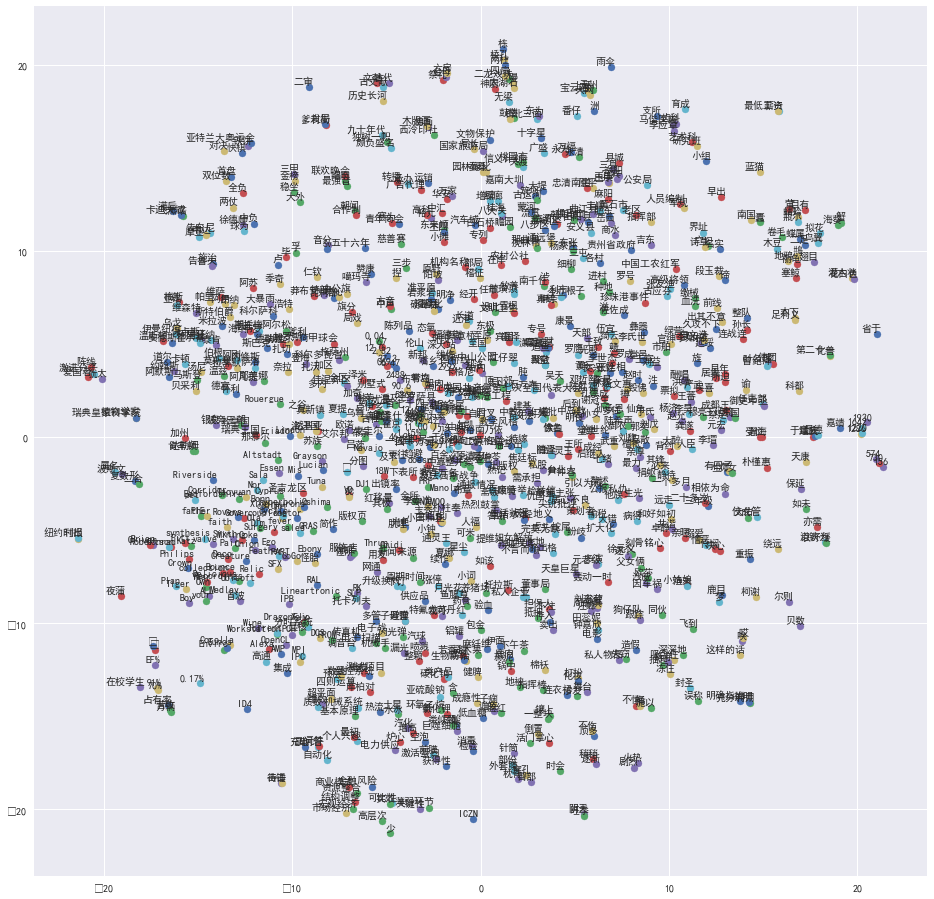

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']
tsne_plot(model)

#### 可视化相似词

In [28]:
def vision(string,num,model):
    y = model.most_similar([string],topn=num)
    label,coor = [],[]
    for i in range(len(y)):
        label.append(y[i][0])
        coor.append(model[y[i][0]])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)   
    new_values = tsne_model.fit_transform(coor)
    
    x,y = [],[]
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 12))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(label[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    string = '`'+ string + '`' + ' Top' + str(num) + '相似词'
    plt.title(label=string,fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


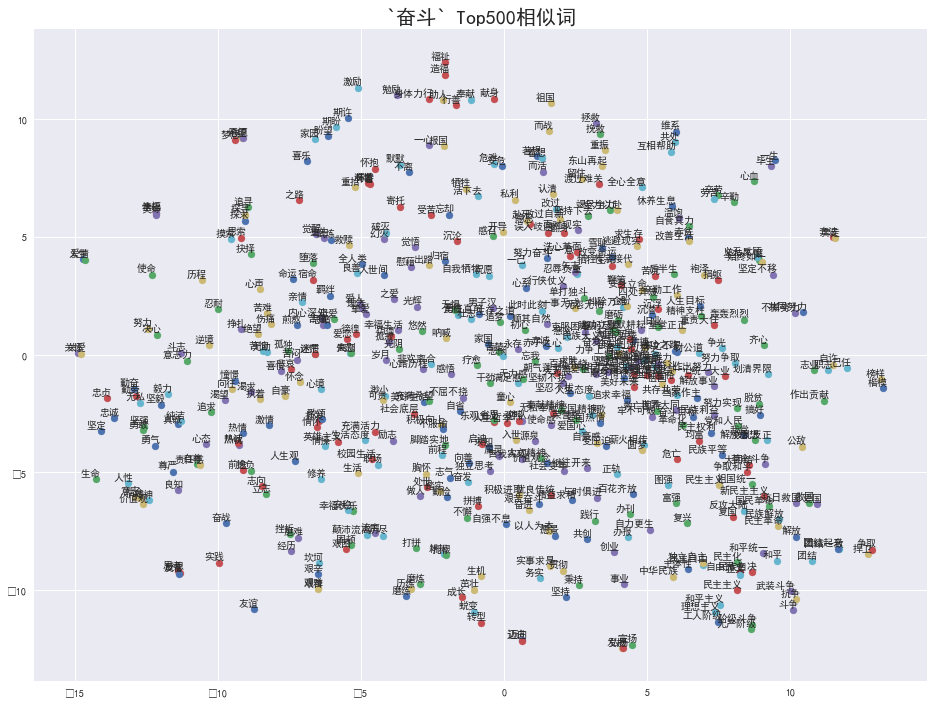

In [58]:
vision('奋斗',500,model)